In [1]:
# Install necessary Python packages using pip

# Use the 'pip' command to install packages
# The '-q' flag stands for 'quiet,' which means it will suppress most output, making the installation process less verbose
# We're installing the following packages:
# - 'evaluate': This package is likely used for evaluation purposes, but the specific functionality is not clear from this line alone
# - 'transformers': This package is commonly used for natural language processing tasks, such as working with pre-trained language models like BERT or GPT
# - 'datasets': This package provides easy access to various datasets commonly used in machine learning and natural language processing tasks
# - 'mlflow': MLflow is an open-source platform for managing the end-to-end machine learning lifecycle, including tracking experiments, packaging code into reproducible runs, and sharing and deploying models

# Note: Before running this code, make sure you have Python and pip installed on your system.
# Also, ensure you have an internet connection since pip will download and install these packages from PyPI (Python Package Index).
!pip install -U -q evaluate transformers datasets>=2.14.5 accelerate>=0.27 2>/dev/null

# CNN MODEL (Convolutional Neural Network) MODEL is a category of machine learning model. Specifically, it is a type of deep learning algorithm that is well suited to analyzing visual data. A neural network architecture designed for processing visual data like images.

# Import important libraries for CNN Model

In [2]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence

# Setting up paths

In [3]:
# Setting up paths
train_dir = '/kaggle/input/deepfake-and-real-images/Dataset/Train'
test_dir = '/kaggle/input/deepfake-and-real-images/Dataset/Test'
val_dir = '/kaggle/input/deepfake-and-real-images/Dataset/Validation'

# Function to add Gaussian noise

In [4]:

def add_noise(img):
    noise_factor = 0.1  # Adjust for noise level
    noisy_img = img + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=img.shape)
    noisy_img = np.clip(noisy_img, 0.0, 1.0)  # Ensure values are between 0 and 1
    return noisy_img

# Custom Data Generator with noise addition

In [5]:

class NoisyImageDataGenerator(Sequence):
    def __init__(self, generator):
        self.generator = generator

    def __len__(self):
        return len(self.generator)

    def __getitem__(self, index):
        images, labels = self.generator[index]
        noisy_images = np.array([add_noise(img) for img in images])  # Apply noise
        return noisy_images, labels

# Data generators

In [6]:

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)
train_generator = NoisyImageDataGenerator(train_generator)  # Add noise

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


# CNN Model

In [7]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the CNN Model

In [8]:

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 2134s 484ms/step - accuracy: 0.6141 - loss: 0.7037 - val_accuracy: 0.5914 - val_loss: 1.3356
Epoch 2/15
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 1217s 278ms/step - accuracy: 0.7591 - loss: 0.4937 - val_accuracy: 0.7487 - val_loss: 0.6897
Epoch 3/15
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 1166s 266ms/step - accuracy: 0.8136 - loss: 0.4084 - val_accuracy: 0.7818 - val_loss: 0.4746
Epoch 4/15
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 1201s 274ms/step - accuracy: 0.8321 - loss: 0.3758 - val_accuracy: 0.8182 - val_loss: 0.3861
Epoch 5/15
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 1150s 262ms/step - accuracy: 0.8440 - loss: 0.3521 - val_accuracy: 0.8385 - val_loss: 0.3467
Epoch 6/15
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 1126s 257ms/step - accuracy: 0.8549 - loss: 0.3350 - val_accuracy: 0.8326 - val_loss: 0.3704
Epoch 7/15
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 1144s 261ms/step - accuracy: 0.8605 - loss: 0.3241 - val_accuracy: 0.8570 - val_loss: 0.3020
Epoch 8/15
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 1131s 258ms/step - accur

# Evaluate on test data

In [9]:

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

341/341 ━━━━━━━━━━━━━━━━━━━━ 111s 326ms/step - accuracy: 0.8396 - loss: 0.3453
Test Loss: 0.31238439679145813
Test Accuracy: 0.8674002885818481


# Predict on Test Data

In [10]:

predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

341/341 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step


# Confusion Matrix

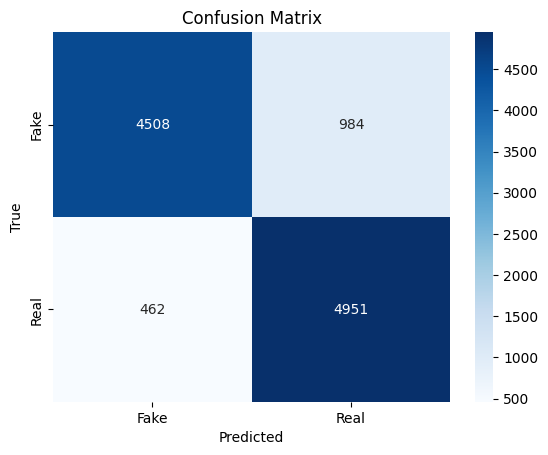

In [11]:

conf_matrix = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report

In [12]:

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        Fake       0.91      0.82      0.86      5492
        Real       0.83      0.91      0.87      5413

    accuracy                           0.87     10905
   macro avg       0.87      0.87      0.87     10905
weighted avg       0.87      0.87      0.87     10905



# Precision, Recall, F1-Score

In [13]:

precision, recall, f1_score, _ = precision_recall_fscore_support(true_classes, predicted_classes, average='binary')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.8342038753159224
Recall: 0.9146499168668022
F1 Score: 0.8725766654917165


# Plot Performance

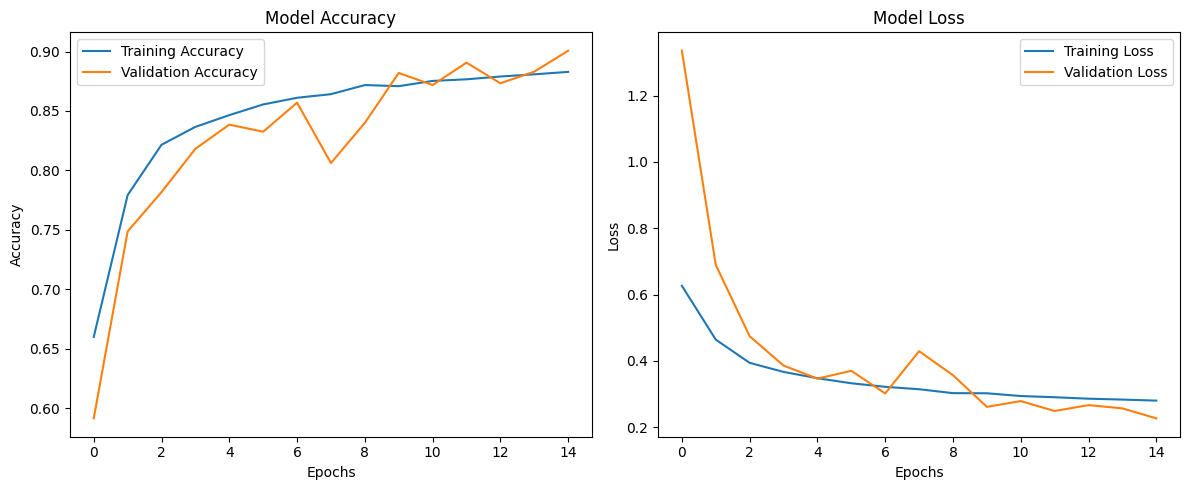

In [14]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Check Test Data Predictions (Real or Fake)

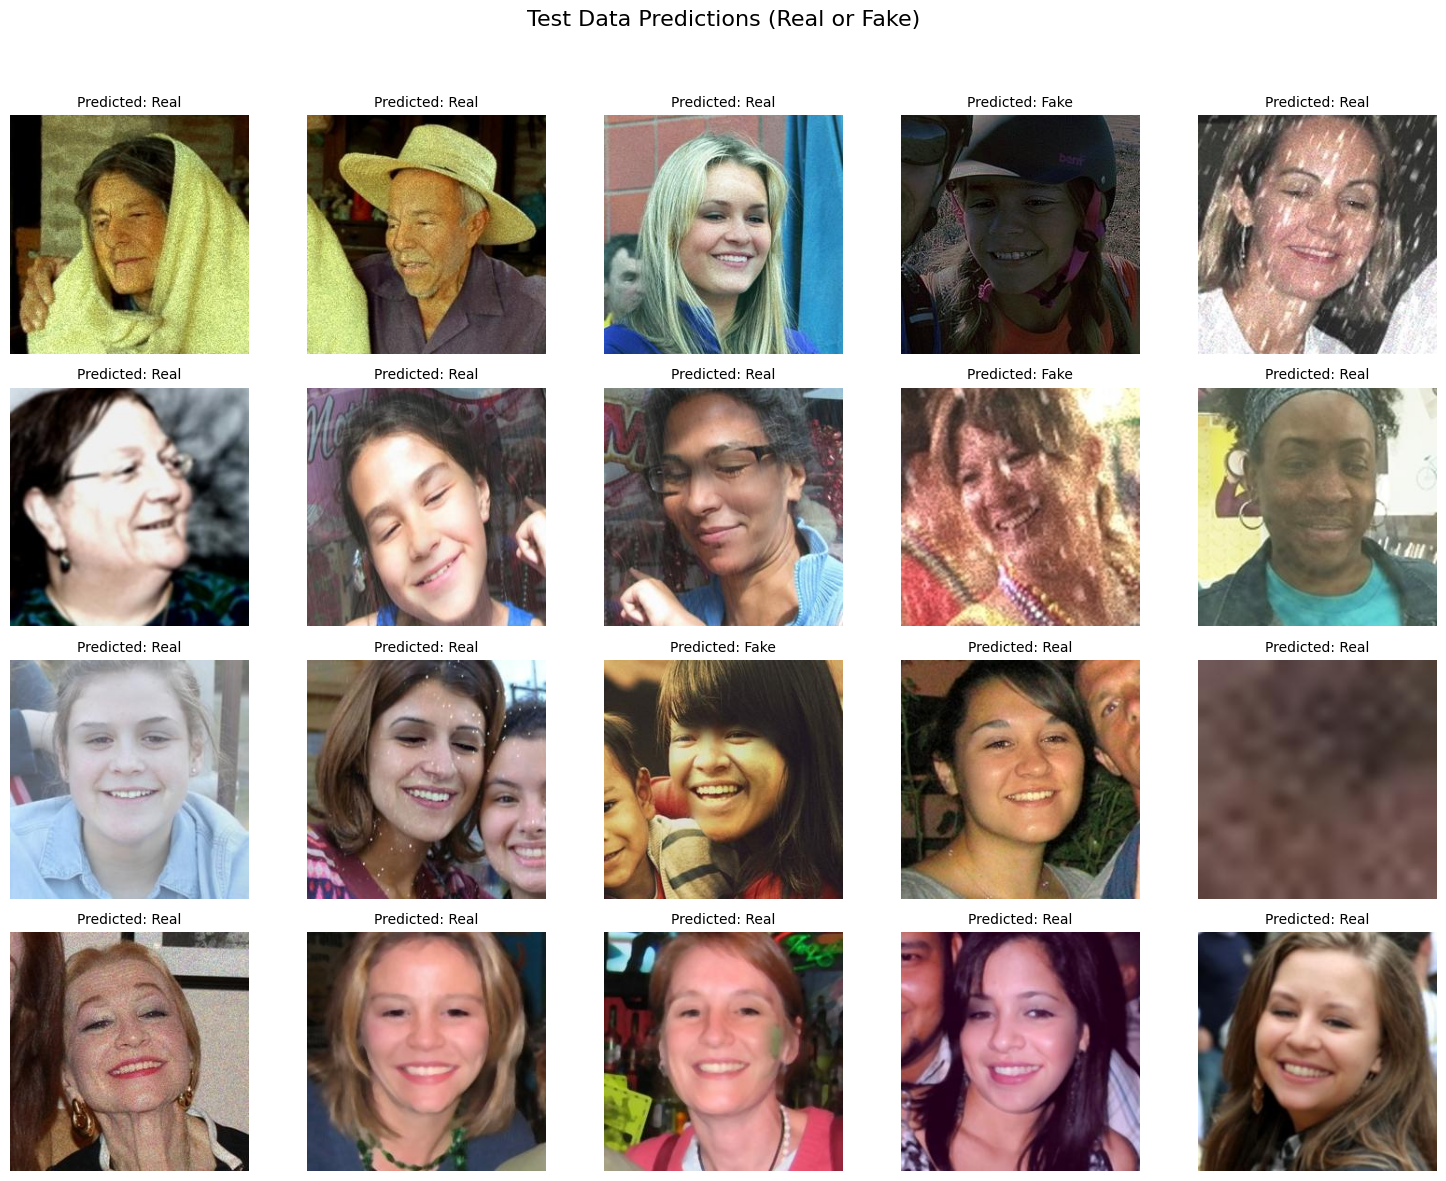

In [15]:
import matplotlib.pyplot as plt
import numpy as np

test_filenames = test_generator.filenames


num_images_to_display = 20


rows, cols = 4, 5 
plt.figure(figsize=(15, 12))

for i in range(num_images_to_display):
    img_path = test_dir + '/' + test_filenames[i]
    img = plt.imread(img_path)

    # Get the prediction
    prediction = 'Real' if predicted_classes[i][0] == 0 else 'Fake'

    # Plot the image
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {prediction}", fontsize=10)
    plt.axis('off')


plt.suptitle("Test Data Predictions (Real or Fake)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

# Transfer Learning Xception Model

# Important Libraries for Xception Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.utils import Sequence

# Function to add Gaussian noise

In [3]:
def add_noise(img):
    noise_factor = 0.1  # Adjust for noise level
    noisy_img = img + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=img.shape)
    noisy_img = np.clip(noisy_img, 0.0, 1.0)  # Ensure values are between 0 and 1
    return noisy_img

# Custom Data Generator with noise addition


In [4]:
class NoisyImageDataGenerator(Sequence):
    def __init__(self, generator):
        self.generator = generator

    def __len__(self):
        return len(self.generator)

    def __getitem__(self, index):
        images, labels = self.generator[index]
        noisy_images = np.array([add_noise(img) for img in images])  # Apply noise
        return noisy_images, labels

# Setting up paths


In [5]:
train_dir = '/kaggle/input/deepfake-and-real-images/Dataset/Train'
val_dir = '/kaggle/input/deepfake-and-real-images/Dataset/Validation'
test_dir = '/kaggle/input/deepfake-and-real-images/Dataset/Test'

# Data generators with augmentation for training


In [6]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  # Xception input size
    batch_size=32,
    class_mode='binary'
)
train_generator = NoisyImageDataGenerator(train_generator)  # Add noise

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


# Load the Xception model without the top layer (classifier)


In [8]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Freeze the base model layers


In [9]:
for layer in base_model.layers:
    layer.trainable = False

# Build the model with additional layers


In [10]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


# Compile the model


In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model


In [12]:
history = model.fit(
    train_generator,
    epochs=1,
    validation_data=val_generator
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 4833s 1s/step - accuracy: 0.6532 - loss: 0.7521 - val_accuracy: 0.7723 - val_loss: 0.4749


# Evaluate on test data


In [13]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")




341/341 ━━━━━━━━━━━━━━━━━━━━ 113s 332ms/step - accuracy: 0.6786 - loss: 0.5478
Test Loss: 0.5295201539993286
Test Accuracy: 0.7325997352600098


# Predictions and evaluation metrics


In [14]:
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

341/341 ━━━━━━━━━━━━━━━━━━━━ 80s 228ms/step


# Confusion Matrix


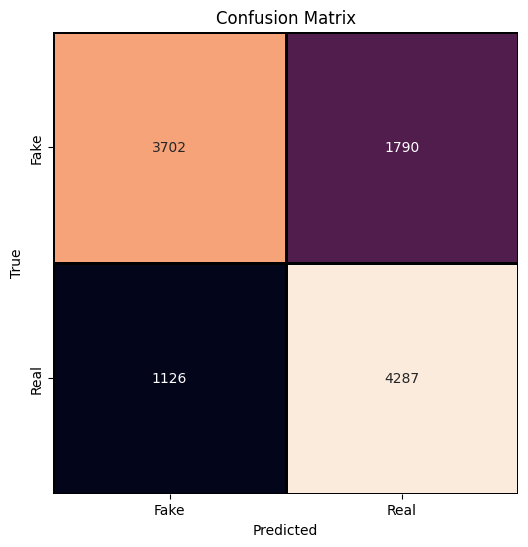

In [15]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, linewidths=1,
            linecolor='black', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report


In [19]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        Fake       0.77      0.67      0.72      5492
        Real       0.71      0.79      0.75      5413

    accuracy                           0.73     10905
   macro avg       0.74      0.73      0.73     10905
weighted avg       0.74      0.73      0.73     10905



# Plot Performance Metrics


In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Check Test Data Predictions (Real or Fake)


In [20]:
test_filenames = test_generator.filenames


In [21]:
# Define the number of images to display
num_images_to_display = 20 

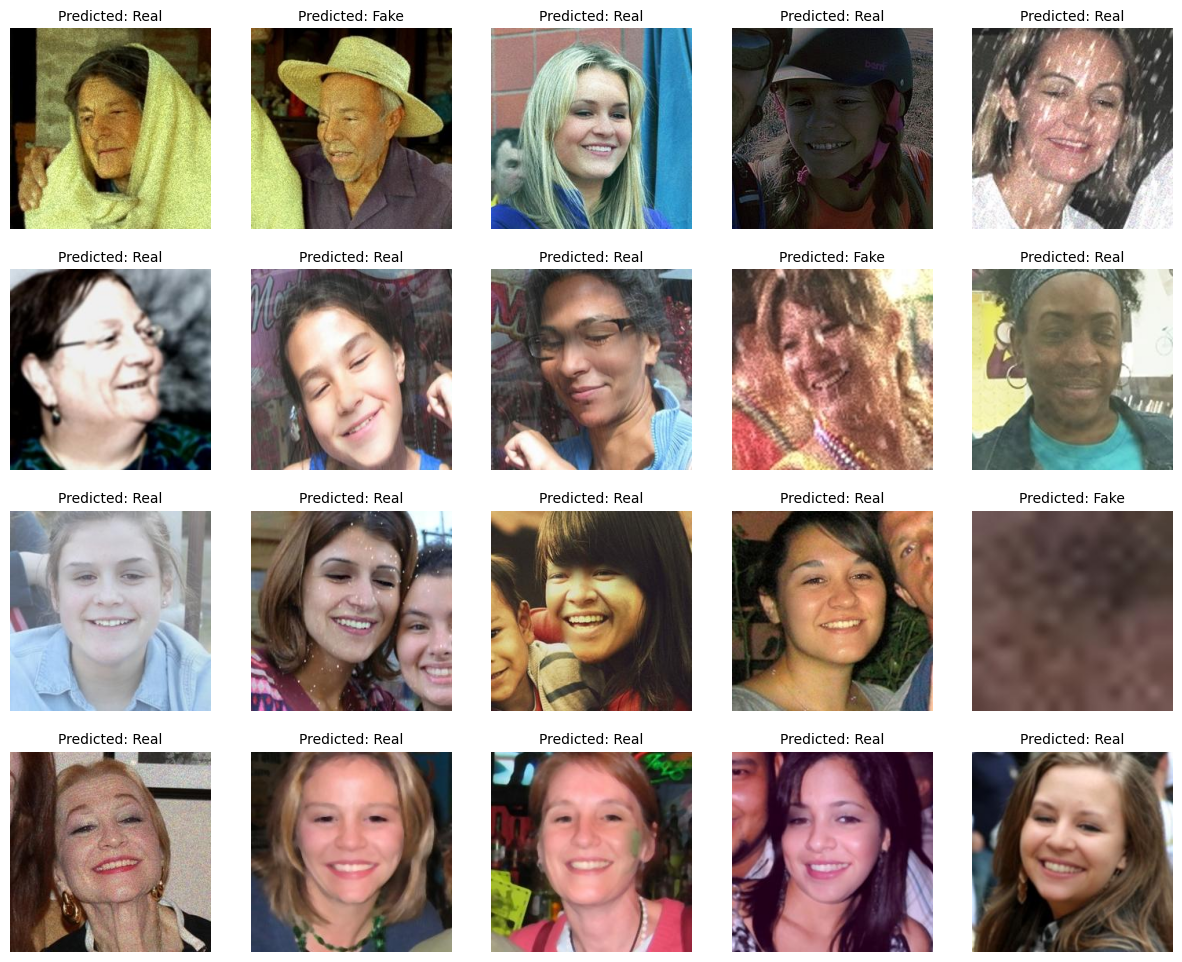

In [22]:
# Create a grid layout for better visualization
rows, cols = 4, 5  
plt.figure(figsize=(15, 12))

for i in range(num_images_to_display):
    img_path = test_dir + '/' + test_filenames[i]
    img = plt.imread(img_path)
    
    # Get the prediction
    prediction = 'Real' if predicted_classes[i][0] == 0 else 'Fake'
    
    # Plot the image
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {prediction}", fontsize=10)
    plt.axis('off')

In [25]:
# Add a title to the overall grid
plt.suptitle("Test Data Predictions (Real or Fake)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

<Figure size 640x480 with 0 Axes>